Jupyter Notebook and Pandas practice

In [23]:
print('hello world')
5 + 5

hello world


10

In [24]:
# imports, read in data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data_training_selected_clusters_comments_and_rules.csv')

In [25]:
# how many column headers are there?
df.columns

Index(['body', 'target_reason', 'target_description', 'public_description',
       'subreddit_id', 'assigned_rule_cluster', 'label'],
      dtype='object')

In [26]:
# What information can I find about the data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32966 entries, 0 to 32965
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   body                   32966 non-null  object
 1   target_reason          32966 non-null  object
 2   target_description     32877 non-null  object
 3   public_description     32945 non-null  object
 4   subreddit_id           32966 non-null  object
 5   assigned_rule_cluster  32966 non-null  object
 6   label                  32966 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [27]:
# How can I see the text, reason, and label?
df[['body', 'target_reason', 'label']]

,body,target_reason,label
0,"i’m white. be quiet, fool.","incivility, overly cruel or hostile",violation
1,Luciferianism?,"incivility, overly cruel or hostile",non_violation
2,West has a hate cult on this sub. Any post inv...,follow the standards of civility,non_violation
3,[deleted],be respectful to others,non_violation
4,Dude... give it up... this is NOT &lt;&lt;caps...,rule b -d party/devils advocate/soapboxing (op...,violation
...,...,...,...
32961,Link on danbooru https://danbooru.donmai.us/po...,"incivility, overly cruel or hostile",non_violation
32962,I've got a Chinese elm I got from Eastern leaf...,uncivil or disrespectful,non_violation
32963,So you just enjoy lying to yourself I see. Tha...,"incivility, overly cruel or hostile",non_violation
32964,YTA find a time where everyone can go wtf is w...,"incivility, overly cruel or hostile",violation


In [28]:
# stats about data
df.describe()

,body,target_reason,target_description,public_description,subreddit_id,assigned_rule_cluster,label
count,32966,32966,32877,32945,32966,32966,32966
unique,30921,269,336,328,334,17,2
top,[deleted],"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation
freq,872,7038,7038,7038,7038,8796,17506


In [29]:
# find shape and length
df.shape, len(df)

((32966, 7), 32966)

In [30]:
# first 5 rows, first two columns
df.iloc[:5, :2]

,body,target_reason
0,"i’m white. be quiet, fool.","incivility, overly cruel or hostile"
1,Luciferianism?,"incivility, overly cruel or hostile"
2,West has a hate cult on this sub. Any post inv...,follow the standards of civility
3,[deleted],be respectful to others
4,Dude... give it up... this is NOT &lt;&lt;caps...,rule b -d party/devils advocate/soapboxing (op...


In [31]:
# for every entry, find whether it was a violation and greater than 50 characters
df.loc[(df['label'] == 'violation')
       & (df['body'].str.len() > 50)
]

,body,target_reason,target_description,public_description,subreddit_id,assigned_rule_cluster,label
4,Dude... give it up... this is NOT &lt;&lt;caps...,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,violation
7,Yeah says me you absolute clown. Typical male ...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation
9,Gms exist.... And it's not hard to speed run n...,"no uncivil behavior, witchhunting, etc",follow proper [reddiquette](/w/reddiquette) wh...,Welcome to Destiny Reddit! This sub is for dis...,t5_2vq0w,C - 02,violation
10,I’m just waiting till we get to the point wher...,be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,violation
12,"Nothing like a shitty, boomer facebook meme to...",be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,violation
...,...,...,...,...,...,...,...
32940,"&gt;craiglikethelist\n\nChrist dude, your post...",uncivil behavior,"personal attacks, name-calling, and harassment...",/r/Dallas is a home for discussion and content...,t5_2qnkr,C - 16,violation
32945,I’m so fucking tired of you weird ass fucking ...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation
32950,"No, no, the Israelis have the full backing of ...",post in a civilized manner,"post in a civilized manner. personal attacks, ...",A place for discussion of Israeli life and cul...,t5_2qhvo,C - 12,violation
32957,"NTA!! Alicia’s a dick! Also, just tell Alicia ...","incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation


In [32]:
# opposite of prev
df.loc[~((df['label'] == 'violation')
       & (df['body'].str.len() > 50))
]

,body,target_reason,target_description,public_description,subreddit_id,assigned_rule_cluster,label
0,"i’m white. be quiet, fool.","incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation
1,Luciferianism?,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation
2,West has a hate cult on this sub. Any post inv...,follow the standards of civility,follow the standards of civility:\n\n* no hate...,A community for discussion related to Unidenti...,t5_2qhds,C - 10,non_violation
3,[deleted],be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,non_violation
5,"Ah excellent, I asked because I remember seein...","incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation
...,...,...,...,...,...,...,...
32960,no idea why I got downvoted to shit lmao. Look...,discriminatory language,discriminatory language and content is not tol...,/r/Dallas is a home for discussion and content...,t5_2qnkr,C - 21,non_violation
32961,Link on danbooru https://danbooru.donmai.us/po...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation
32962,I've got a Chinese elm I got from Eastern leaf...,uncivil or disrespectful,be respectful of others and their opinions. fo...,"A subreddit dedicated to Fire Emblem Heroes, N...",t5_3imv0,C - 16,non_violation
32963,So you just enjoy lying to yourself I see. Tha...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation


In [33]:
# find all the rows that are violations
vi = "violation"
df.query('label == @vi')

,body,target_reason,target_description,public_description,subreddit_id,assigned_rule_cluster,label
0,"i’m white. be quiet, fool.","incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation
4,Dude... give it up... this is NOT &lt;&lt;caps...,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,violation
7,Yeah says me you absolute clown. Typical male ...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation
9,Gms exist.... And it's not hard to speed run n...,"no uncivil behavior, witchhunting, etc",follow proper [reddiquette](/w/reddiquette) wh...,Welcome to Destiny Reddit! This sub is for dis...,t5_2vq0w,C - 02,violation
10,I’m just waiting till we get to the point wher...,be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,violation
...,...,...,...,...,...,...,...
32952,Does a chicken cluck dum fuck,be respectful to others,"remember, there's a human being behind the oth...",Planning on building a computer but need some ...,t5_2rnve,C - 08,violation
32957,"NTA!! Alicia’s a dick! Also, just tell Alicia ...","incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation
32958,You're fucking retarded,be friendly,personal attacks on your fellow reddit users a...,"News, events, and general noise related to the...",t5_2qho4,C - 06,violation
32964,YTA find a time where everyone can go wtf is w...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation


In [34]:
# total number of violations
(df['label'] == 'violation').sum()

np.int64(15460)

In [35]:
# avg body length
(df['body'].str.len()).mean()

np.float64(234.48328580962203)

In [36]:
# print all the reasons, plus count for each
df['target_reason'].value_counts().reset_index()

,target_reason,count
0,"incivility, overly cruel or hostile",7038
1,rule b -d party/devils advocate/soapboxing (op...,4410
2,be respectful to others,2347
3,be friendly,1884
4,"no hate-speech, personal attacks or harassment",1306
...,...,...
264,be kind and no drama,1
265,"no racism, bigotry or hate speech",1
266,"no racism (i.e., no slurs, racist generalizati...",1
267,"no trolling, hate speech, or using slurs",1


In [37]:
# how many comments were taken from each subreddit
df['subreddit_id'].value_counts().reset_index()

,subreddit_id,count
0,t5_2xhvq,7038
1,t5_2w2s8,4410
2,t5_2qhw9,1940
3,t5_2qho4,1884
4,t5_3h47q,1306
...,...,...
329,t5_k4fie,1
330,t5_32g1x,1
331,t5_2tand,1
332,t5_2tifv,1


In [38]:
# sort comments by body len
df.sort_values(by='body', key=lambda s: s.str.len())

,body,target_reason,target_description,public_description,subreddit_id,assigned_rule_cluster,label
7140,🙊,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,non_violation
15073,👀,"attacking somebody, bigotry, or creep/pedo","**no negative user related posts** (e.g. ""who ...",Ask teen girls questions! Please read the rule...,t5_21tv8q,C - 27,non_violation
32522,?,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,non_violation
27458,…,be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,non_violation
13175,5,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,non_violation
...,...,...,...,...,...,...,...
10187,>Sound plausible? Because I think it is. St. P...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation
30309,"> Rosenthal, one of Germany’s oldest porcelain...",no disrespectful language or conduct,"don’t be a jerk. act maturely. no racism, unne...",For experienced developers. This community sho...,t5_e0gez,C - 02,non_violation
31241,Our system is woefully unprepared for this lon...,be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,non_violation
11045,"OKAY, THAT IS IT! THIS IS THE FINAL STRAAAAWW!...",post in a civilized manner,"post in a civilized manner. personal attacks, ...",A place for discussion of Israeli life and cul...,t5_2qhvo,C - 12,non_violation


In [39]:
# sort comments by body len, descending
df.sort_values(by='body', key=lambda s: s.str.len(), ascending=False)

,body,target_reason,target_description,public_description,subreddit_id,assigned_rule_cluster,label
18107,&gt; First thing I wanna point out is that the...,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,violation
11045,"OKAY, THAT IS IT! THIS IS THE FINAL STRAAAAWW!...",post in a civilized manner,"post in a civilized manner. personal attacks, ...",A place for discussion of Israeli life and cul...,t5_2qhvo,C - 12,non_violation
31241,Our system is woefully unprepared for this lon...,be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,non_violation
30309,"> Rosenthal, one of Germany’s oldest porcelain...",no disrespectful language or conduct,"don’t be a jerk. act maturely. no racism, unne...",For experienced developers. This community sho...,t5_e0gez,C - 02,non_violation
10187,>Sound plausible? Because I think it is. St. P...,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation
...,...,...,...,...,...,...,...
26188,😆,personal attack or off topic,"name calling, shaming, judgmental comments, an...",Welcome!\n\nr/MUAontheCheap is an actively mod...,t5_3m2bs,C - 31,non_violation
32522,?,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,non_violation
13175,5,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,non_violation
15264,😍,"needlessly hurtful, rude, or harassing",our community is built around supporting and a...,The C was sold to pay for polish 💅,t5_2se5q,C - 16,non_violation


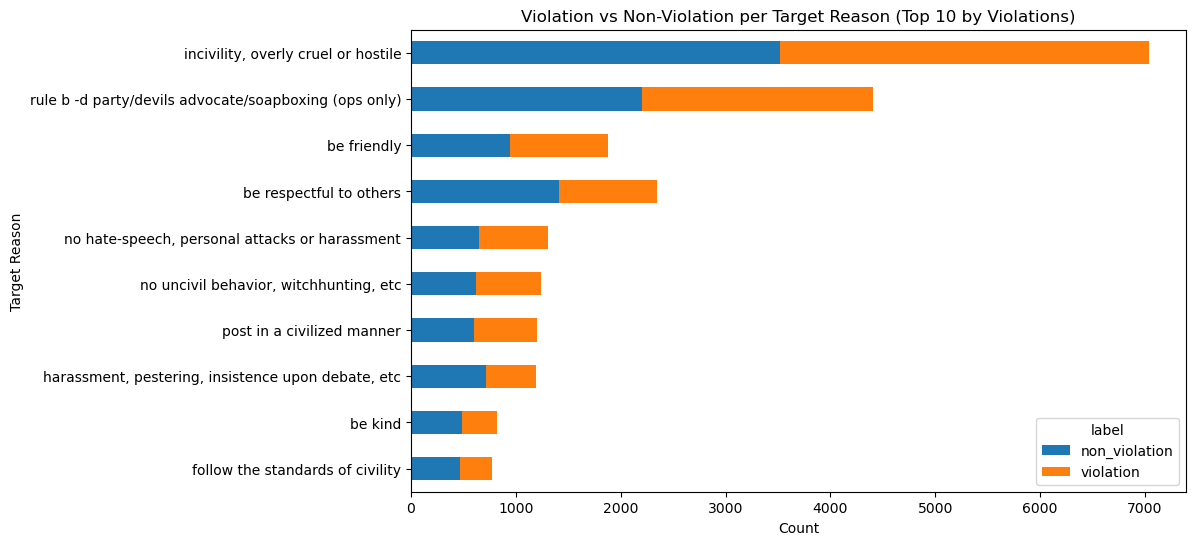

In [40]:
# what are the top violation categories, by count?
violation_counts = df[df['label'] == 'violation']['target_reason'].value_counts().head(10)
top_reasons = violation_counts.index

df_top = df[df['target_reason'].isin(top_reasons)]

counts_top = df_top.groupby(['target_reason', 'label']).size().reset_index(name='count')
pivot_top = counts_top.pivot(index='target_reason', columns='label', values='count').fillna(0)

pivot_top = pivot_top.loc[violation_counts.index]

pivot_top.plot(kind='barh', stacked=True, figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('Target Reason')
plt.title('Violation vs Non-Violation per Target Reason (Top 10 by Violations)')
plt.gca().invert_yaxis()  # largest violations on top
plt.show()

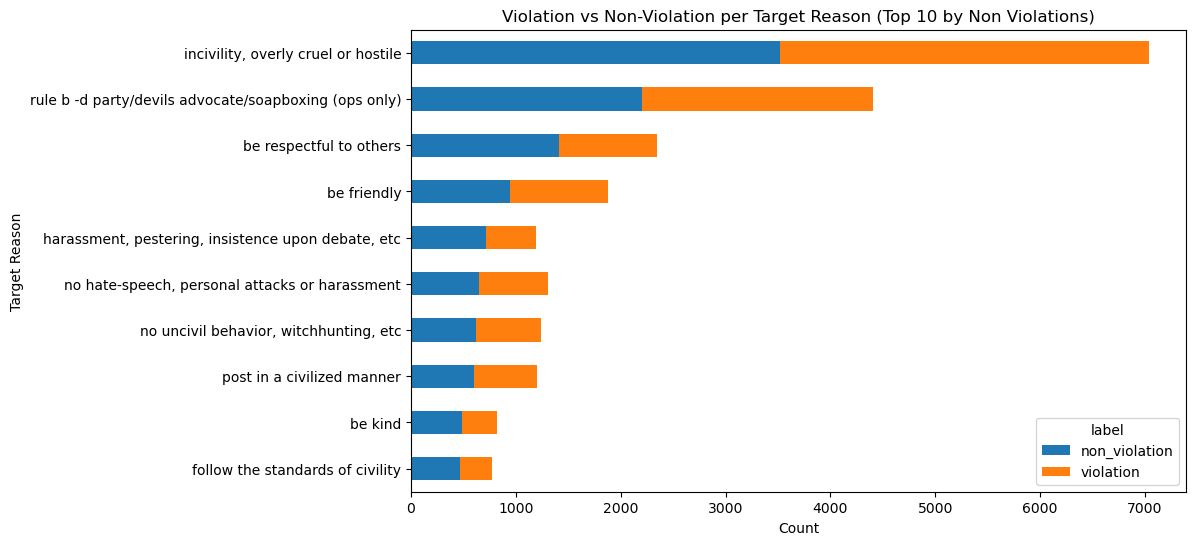

In [41]:
# what are the top non-violation categories, by count?
violation_counts = df[df['label'] == 'non_violation']['target_reason'].value_counts().head(10)
top_reasons = violation_counts.index

df_top = df[df['target_reason'].isin(top_reasons)]

counts_top = df_top.groupby(['target_reason', 'label']).size().reset_index(name='count')
pivot_top = counts_top.pivot(index='target_reason', columns='label', values='count').fillna(0)

pivot_top = pivot_top.loc[violation_counts.index]

pivot_top.plot(kind='barh', stacked=True, figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('Target Reason')
plt.title('Violation vs Non-Violation per Target Reason (Top 10 by Non Violations)')
plt.gca().invert_yaxis()  # largest violations on top
plt.show()

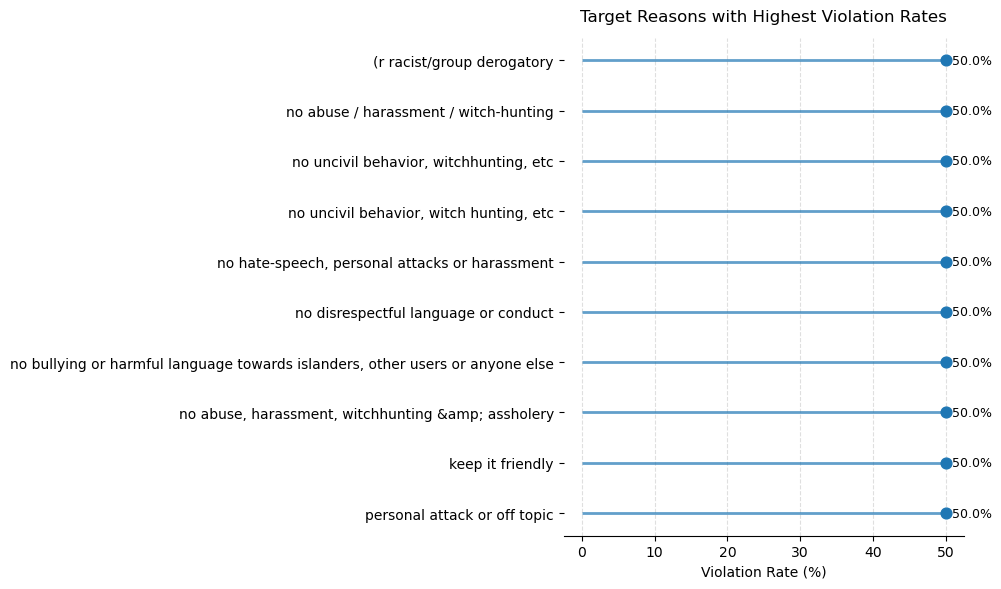

In [42]:

fig, ax = plt.subplots(figsize=(10, 6))

y = range(len(top_ratio))
x = top_ratio['violation_ratio'] * 100

# Lollipop stems
ax.hlines(y=y, xmin=0, xmax=x, linewidth=2, alpha=0.7)

# Lollipop heads
ax.scatter(x, y, s=60, zorder=3)

# Axes & labels
ax.set_yticks(y)
ax.set_yticklabels(top_ratio.index)
ax.set_xlabel('Violation Rate (%)')
ax.set_title('Target Reasons with Highest Violation Rates', pad=12)

# Grid for readability
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Clean spines
ax.invert_yaxis()
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Value labels
for i, v in enumerate(x):
    ax.text(v + 0.8, i, f"{v:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()


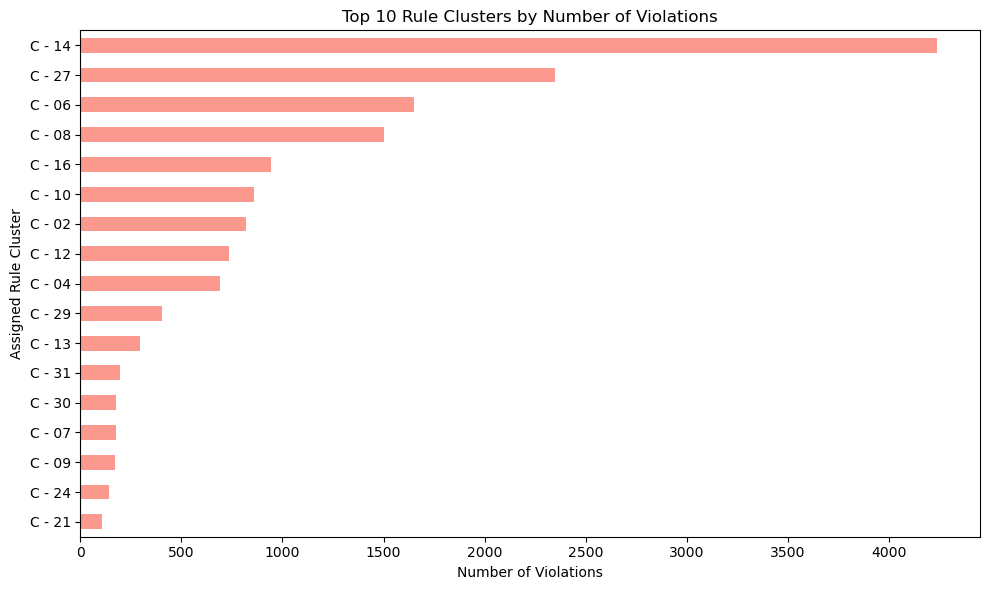

In [43]:
# how do the clusters rank in order of number of violations?
violations_df = df[df['label'] == 'violation']
cluster_counts = violations_df['assigned_rule_cluster'].value_counts()
fig, ax = plt.subplots(figsize=(10,6))
cluster_counts.plot(kind='barh', color='salmon', alpha=0.8, ax=ax)

ax.set_xlabel('Number of Violations')
ax.set_ylabel('Assigned Rule Cluster')
ax.set_title('Top 10 Rule Clusters by Number of Violations')
ax.invert_yaxis() 

plt.tight_layout()

plt.show()

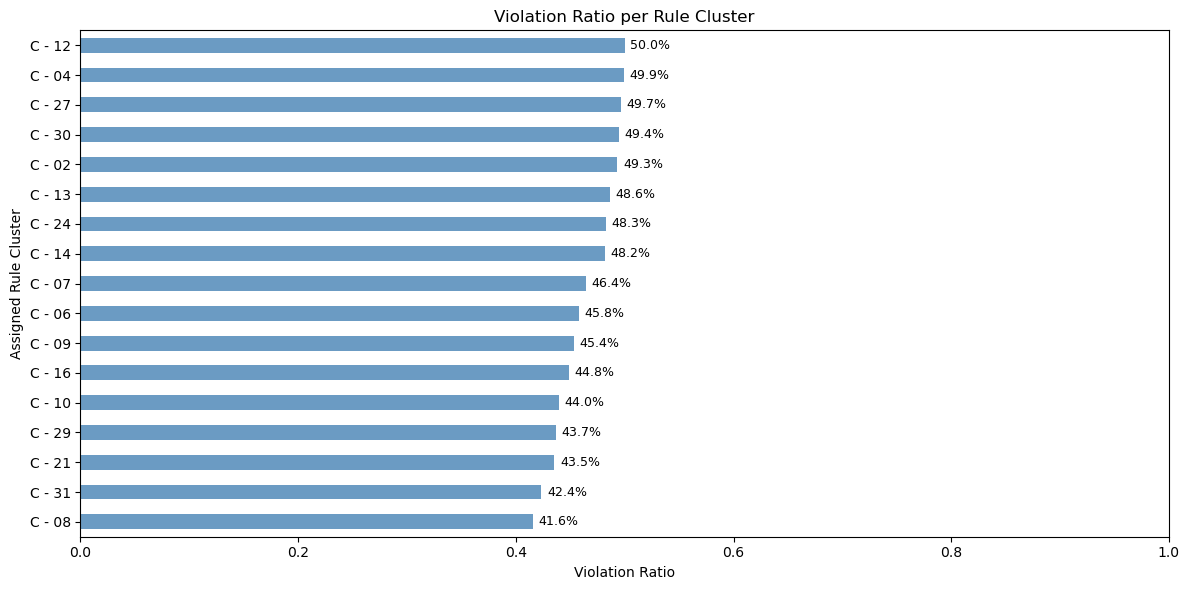

In [44]:
# how do the clusters rank in order of ratios of violations?
total_counts = df.groupby('assigned_rule_cluster').size()
violation_counts = df[df['label'] == 'violation'].groupby('assigned_rule_cluster').size()

ratio_df = pd.DataFrame({
    'violations': violation_counts,
    'total': total_counts
}).fillna(0)

ratio_df['violation_ratio'] = ratio_df['violations'] / ratio_df['total']

ratio_df = ratio_df.sort_values('violation_ratio', ascending=False)

fig, ax = plt.subplots(figsize=(12, max(6, len(ratio_df)*0.3)))
ratio_df['violation_ratio'].plot(kind='barh', color='steelblue', alpha=0.8, ax=ax)

ax.set_xlabel('Violation Ratio')
ax.set_ylabel('Assigned Rule Cluster')
ax.set_title('Violation Ratio per Rule Cluster')
ax.invert_yaxis()  
ax.set_xlim(0, 1)

for i, v in enumerate(ratio_df['violation_ratio']):
    ax.text(v + 0.005, i, f"{v*100:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()